In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../result/top-daily-world-final.csv')
data.head()

,spotify_id,name,artists,artists_ids,song_genre,daily_rank,daily_movement,weekly_movement,country,snapshot_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5vNRhkKd0yEAg8suGBpjeY,APT.,ROSÉ,3eVa5w3URK5duf6eyVDbu9,pop,1,0,0,NaN,2024-11-01,...,0,-4.477,0,0.2600,0.02830,0.0000,0.355,0.939,149.027,4
1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,Lady Gaga,1HY2Jd0NmPuamShAr6KMms,pop,2,0,0,NaN,2024-11-01,...,6,-7.777,0,0.0304,0.30800,0.0000,0.122,0.535,157.969,3
2,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH,pop,3,1,0,NaN,2024-11-01,...,2,-10.171,1,0.0358,0.20000,0.0608,0.117,0.438,104.978,4
3,1QoyuMHNBe7lg3YW4Qtll4,St. Chroma (feat. Daniel Caesar),"Tyler, The Creator",4V8LLVI7PbaPR0K2TGSxFF,hip-hop,4,-1,46,NaN,2024-11-01,...,0,-5.058,1,0.5550,0.35700,0.0000,0.368,0.373,150.450,4
4,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,1oSPZhvZMIrWW5I41kPkkY,pop,5,3,0,NaN,2024-11-01,...,0,-3.743,0,0.0320,0.00289,0.0000,0.193,0.838,116.034,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18707 entries, 0 to 18706
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          18707 non-null  object 
 1   name                18707 non-null  object 
 2   artists             18707 non-null  object 
 3   artists_ids         18707 non-null  object 
 4   song_genre          18707 non-null  object 
 5   daily_rank          18707 non-null  int64  
 6   daily_movement      18707 non-null  int64  
 7   weekly_movement     18707 non-null  int64  
 8   country             0 non-null      float64
 9   snapshot_date       18707 non-null  object 
 10  popularity          18707 non-null  int64  
 11  is_explicit         18707 non-null  bool   
 12  duration_ms         18707 non-null  int64  
 13  album_name          18704 non-null  object 
 14  album_release_date  18704 non-null  object 
 15  danceability        18707 non-null  float64
 16  ener

In [4]:
data2 = pd.read_csv('../result/top-world-artists.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          350 non-null    object
 1   name        350 non-null    object
 2   genre       301 non-null    object
 3   popularity  350 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 11.1+ KB


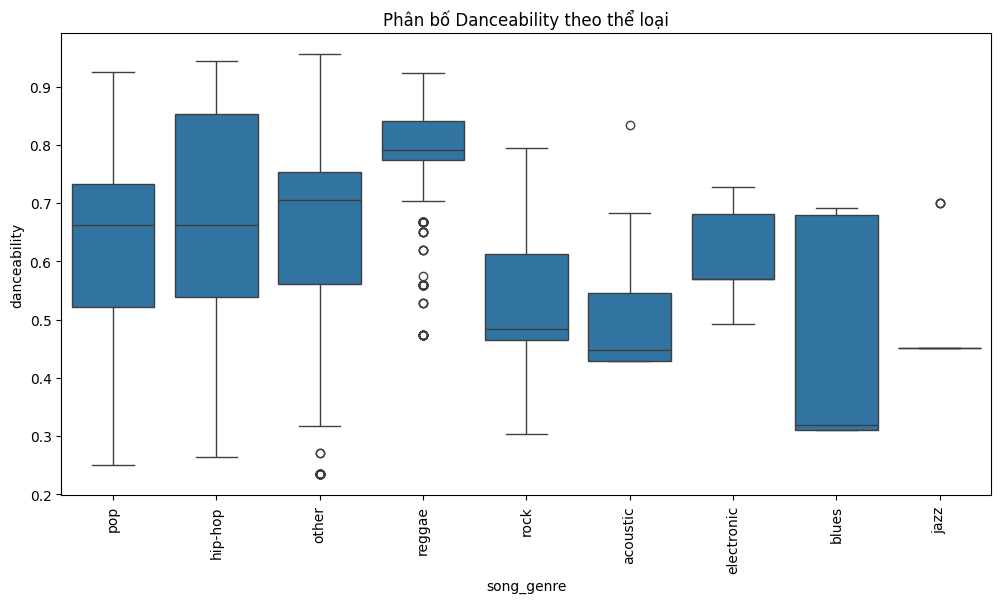

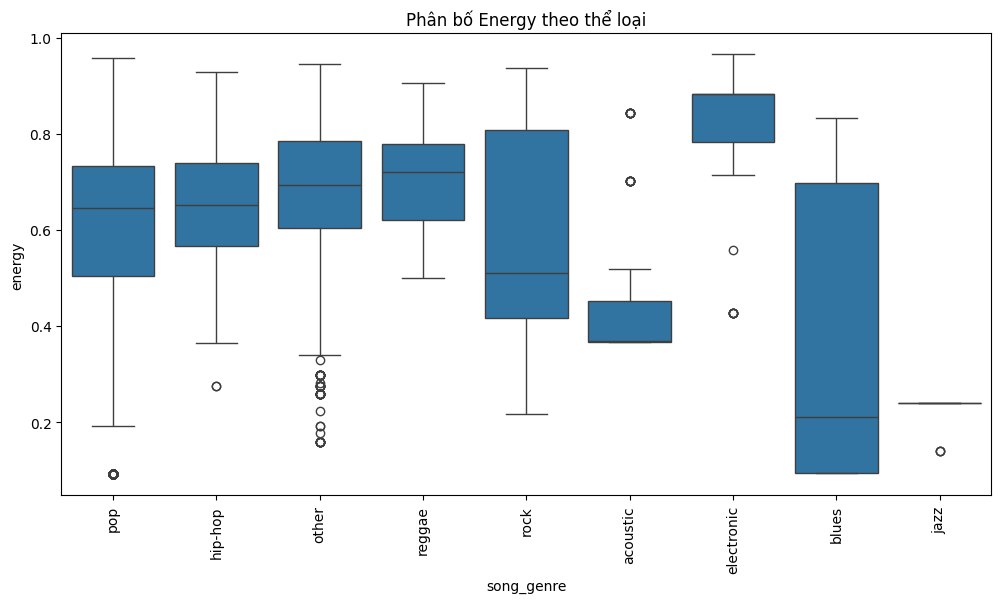

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='song_genre', y='danceability')
plt.title('Phân bố Danceability theo thể loại')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='song_genre', y='energy')
plt.title('Phân bố Energy theo thể loại')
plt.xticks(rotation=90)
plt.show()


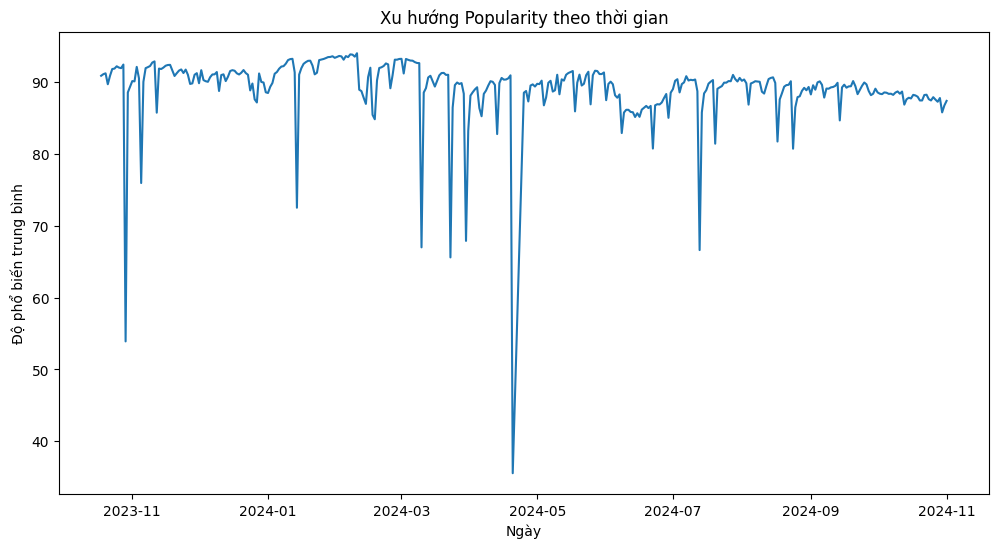

In [6]:
data['snapshot_date'] = pd.to_datetime(data['snapshot_date'])
popularity_trend = data.groupby('snapshot_date')['popularity'].mean()

plt.figure(figsize=(12, 6))
plt.plot(popularity_trend)
plt.title('Xu hướng Popularity theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Độ phổ biến trung bình')
plt.show()


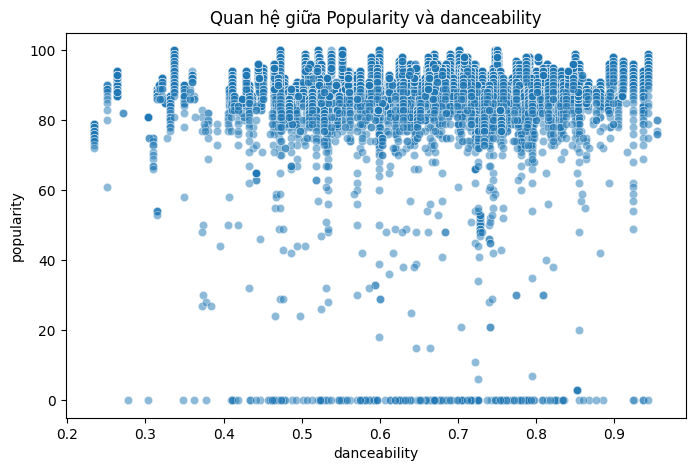

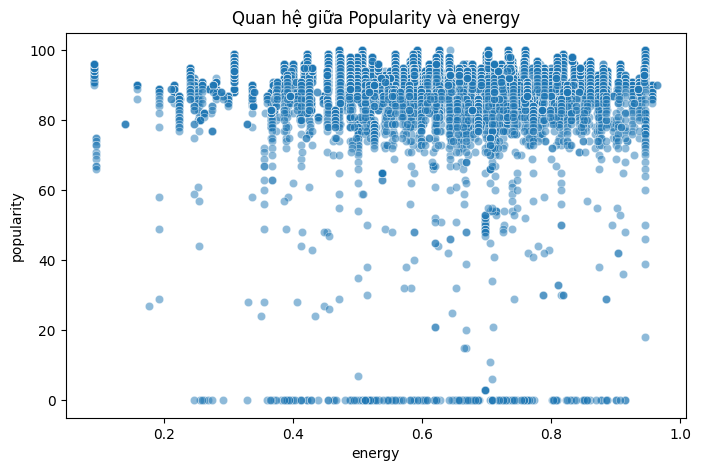

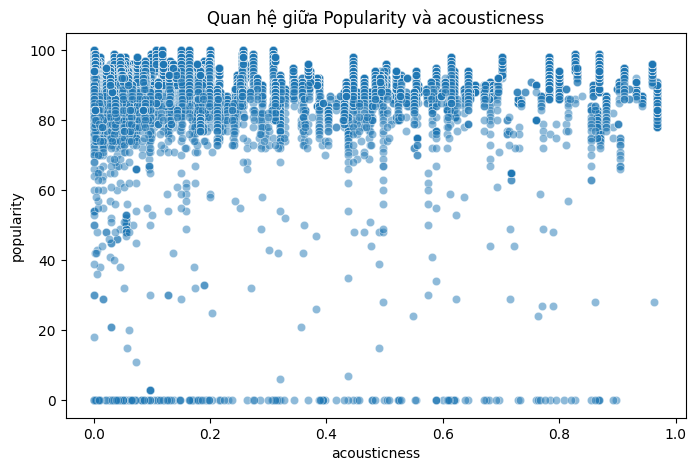

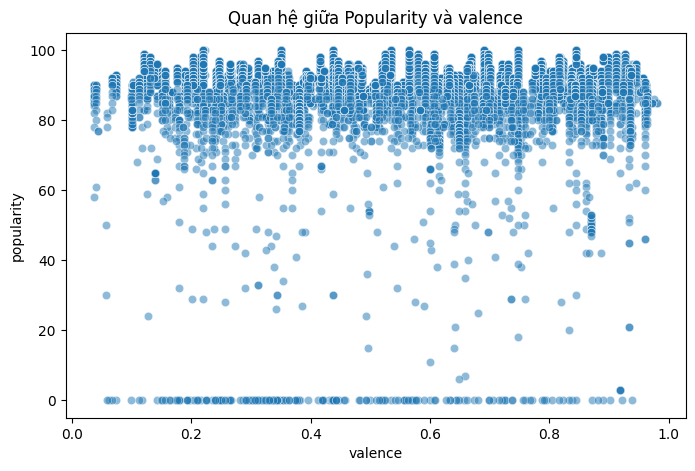

In [8]:
features = ['danceability', 'energy', 'acousticness', 'valence']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=feature, y='popularity', alpha=0.5)
    plt.title(f'Quan hệ giữa Popularity và {feature}')
    plt.show()


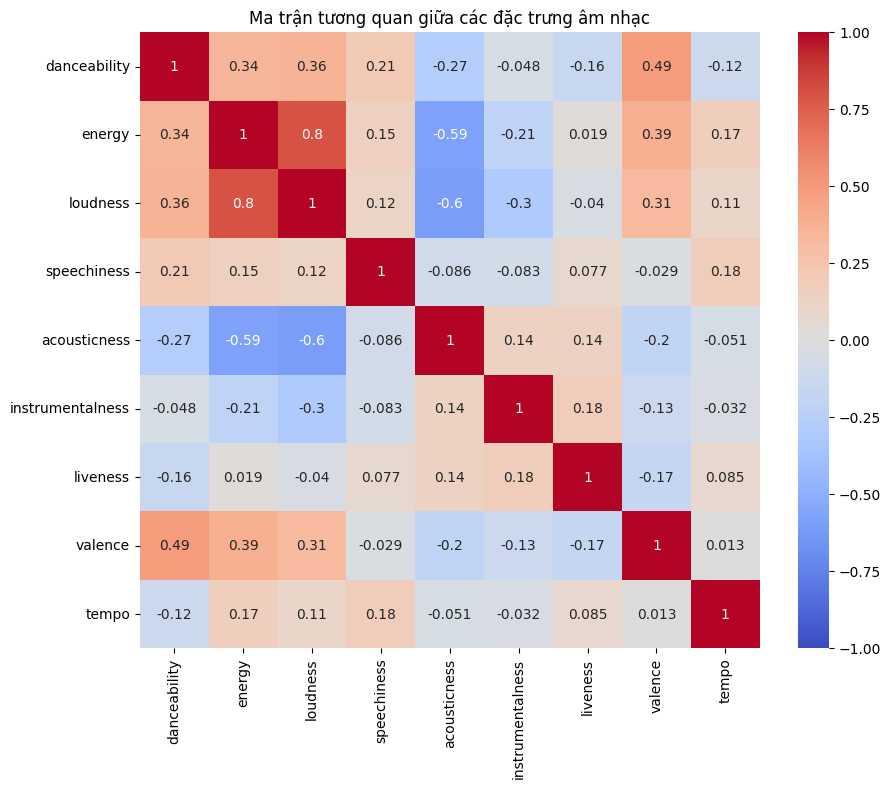

In [9]:
music_features = data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
corr = music_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các đặc trưng âm nhạc')
plt.show()


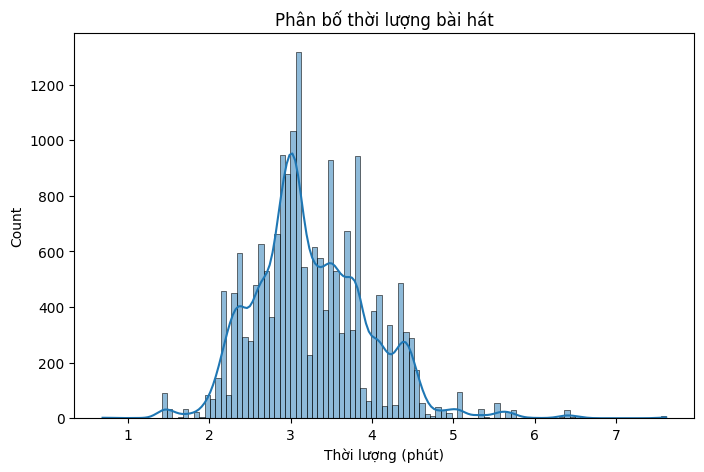

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data['duration_ms'] / 60000, kde=True)  # Chuyển đổi ms sang phút
plt.xlabel('Thời lượng (phút)')
plt.title('Phân bố thời lượng bài hát')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_17196\3883888608.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette='viridis')


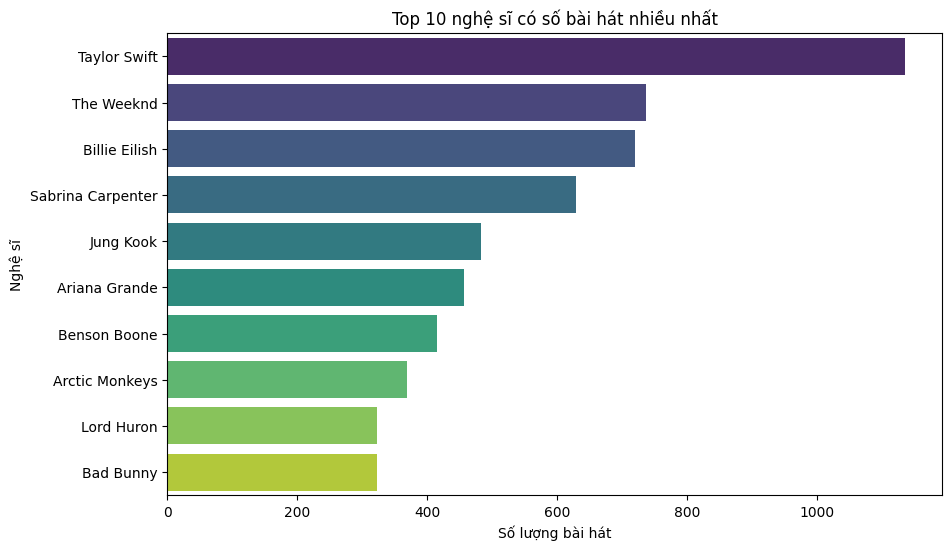

In [11]:
top_artists = data['artists'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_artists.index, x=top_artists.values, palette='viridis')
plt.title('Top 10 nghệ sĩ có số bài hát nhiều nhất')
plt.xlabel('Số lượng bài hát')
plt.ylabel('Nghệ sĩ')
plt.show()


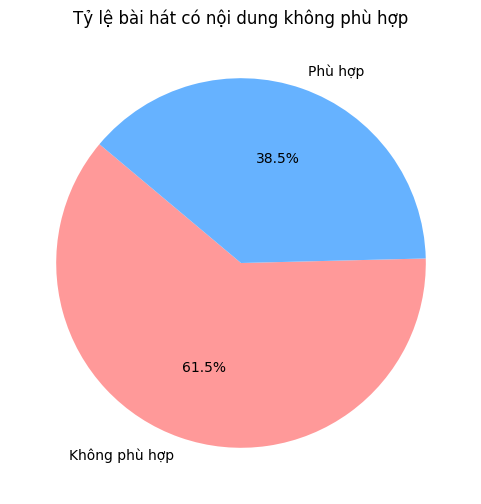

In [12]:
explicit_counts = data['is_explicit'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(explicit_counts, labels=['Không phù hợp', 'Phù hợp'], autopct='%1.1f%%', startangle=140, colors=['#FF9999','#66B2FF'])
plt.title('Tỷ lệ bài hát có nội dung không phù hợp')
plt.show()
